<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}






In [85]:
import numpy as np 
import math
import matplotlib.pyplot as plt

In [86]:
def exp(x,N):
  suma=0
  for u in range(0,N):
    exu=(((-1)**u)*(x**u)/math.factorial(u))
    suma+=exu
  return suma

- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}


In [87]:
#Comparando x<=1 con la funcion exacta
xs=np.arange(0.01,1,0.0001)
L=[exp(i,100) for i in xs]
L1=[math.exp(-i)for i in xs]

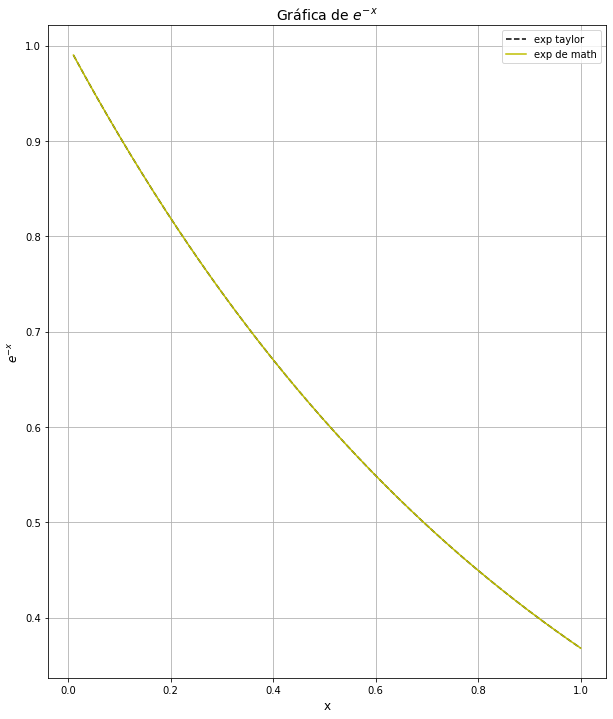

In [88]:
#Gráficas para visualizarlo  
plt.figure(figsize=(10,12))
plt.plot(xs,L,color='black',linestyle='--',label="exp taylor")
plt.plot(xs,L1,color='y',label="exp de math")
plt.xlabel("x",size=12)
plt.ylabel("$e^{{-x}}$",size=12)
plt.title("Gráfica de $e^{{-x}}$",size=14)
plt.legend()
plt.grid(True)

In [80]:
#Es posible observar  en la gráfica que para cierto valor de x las dos funciones son aproximadamente igual 
#quizas el problema sea cuando el x es más grande 

In [89]:
error=10**-7
def find_N(x, error):
    N = 1
    while abs(exp(x,N+1) - exp(x,N)) > error * abs(exp(x,N)):
        N += 1
    return N

In [90]:
find_N(2,error) #se puede probar con x diferentes

16

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.



In [91]:
lista=[]
def exCan(x,N):
  sum=0
  for u in range(0,N):
    exu=(((-1)**u)*(x**u)/math.factorial(u))
    lista.append(exu)
  return lista

In [92]:
exp(10,100)

4.5399929433607724e-05

In [ ]:
#A continuación se puede ver las cancelaciones substractivas
Canc=exCan(10,100);Canc

In [94]:
#La cancelación casi perfecta 
Canc[9:11]

[-2755.731922398589, 2755.731922398589]

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors




In [95]:
def exp_taylr(x, N):
    suma = 0
    for n in range(N):
        termino = x**n / math.factorial(n)
        suma += termino
    return suma

def exp1(x, N):
   if x<0:
      return 1 / exp_taylr(-x, N)


In [96]:
#comparar la precision para valores grandes de x 
listaA=[]
listaB=[]
for i in range(-50,-20):
  term1=exp1(i,1000)
  term2=exp(i,1000)
  delta1=abs(math.exp(i)-term1)
  delta2=abs(math.exp(i)-term2)
  listaA.append(delta1)
  listaB.append(delta2)
  
  
for i in range(0,len(listaA)):
  if listaA[i]<listaB[i]:
    print("El método  1/exp(x) es más preciso ")
  else:
    print("El método exp(-x) es más preciso ")
   

El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más preciso 
El método  1/exp(x) es más p

In [97]:
exp1(-50,1000),exp(50,1000)
#incluso con valores de x no tan grandes vemos que el primer método
#es mucho menos eficiente que el último donde se halló a través de 1/exp(x)

(1.9287498479639164e-22, -7015.776232597128)

- By progressively increasing x from 1 to 10, and then from 10 to  100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges
Make a series of graphs of the error versus N for different values of x.

In [98]:
Err = 1e-14  # precisión que puede definirse 
N = 100
for x in range(1,11):
   exacto = math.exp(-x)
   aproximacion = exp(x, N)
   error = abs(exacto - aproximacion)
   if error > Err:
      print(f"La serie de Taylor comienza a perder precisión en x = {x}")
      break
   x +=1

La serie de Taylor comienza a perder precisión en x = 7


In [99]:
Err = 1e-14  # precisión que puede definirse 
N = 100 
for x in range(10,100,10):
   exacto = math.exp(-x)
   aproximacion = exp(x, N)
   error = abs(exacto - aproximacion)
   if error > Err:
      print(f"La serie de Taylor comienza a perder precisión en x = {x}")
      break
   x +=10

La serie de Taylor comienza a perder precisión en x = 10


In [100]:
def error(x,N):
  exacto = math.exp(-x)
  aproximacion = exp(x, N)
  error = abs(exacto - aproximacion)
  return error

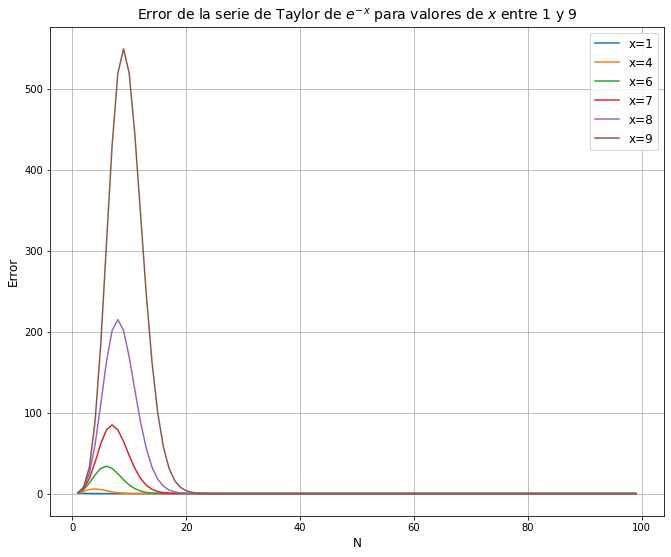

In [102]:
#Gráficas del error versus N para diferentes valores de x
import matplotlib.pyplot as plt
#La lista x_ tiene los valores de x ,que definí arbitrariamente
x_ = [1,4,6,7,8,9]

# Valores de N a utilizar para la serie de Taylor
valores_N = np.arange(1, 100)
plt.figure(figsize=(11, 9))
# Graficar el error para cada valor de x
for x in x_:
    errores = [error(x, N) for N in valores_N]
    plt.plot(valores_N, errores,label=f'x={x}')
   
plt.xlabel('N',size=12)
plt.ylabel('Error',size=12)
plt.title('Error de la serie de Taylor de $e^{-x}$ para valores de $x$ entre 1 y 9',size=14)
plt.grid()
plt.legend(fontsize=12)
plt.show()


In [103]:
def converge(x, error):
    N = 0
    while abs(exp(x, N)) < error:
        if exp(x,N)== 0:
            N += 1
            continue
        cociente = exp(x, N) / exp(x, N+1)
        if abs(cociente) >= 1:
            print("La serie diverge")
            break
        else:
            N += 1
    else:
        print("La serie converge")
    return N

## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$


In [104]:
#SN1
def sn1(N):
  suma=0
  for n in range(1,2*N+1):
   s=((-1)**n)*(n/(n+1))
   suma+=s
  return suma

In [105]:
#SN2
def sn2(N):
  suma1=0
  suma2=0
  for n in range(1,N+1):
   s1=(2*n-1)/(2*n)
   s2=(2*n)/(2*n+1)
   suma1+=s1
   suma2+=s2
   sumat=+suma2-suma1
  return sumat

In [106]:
#SN3
def sn3(N):
  suma=0
  for n in range(1,N+1):
   s=1/((2*n)*(2*n+1))
   suma+=s
  return suma

- Estudiar la convergencia de la serie para los tres casos.



In [107]:
N=[i for i in range(1,1000)]
LISTA1=[sn1(i) for i in N  ]
LISTA2=[sn2(i) for i in N  ]
LISTA3=[sn3(i) for i in N  ]

In [108]:
error = 1e-19  # Definir el valor de error deseado
N = 1          # Iniciar en N = 1
iteraciones = 100000  # Definir un número máximo de iteraciones

while N < iteraciones:
    suc = sn1(N)
    v_exct = sn3(N)

    if abs(suc - v_exct) < error:
        print("La serie empieza a converger en", N)
        break  # Salir del ciclo si se encuentra la convergencia

    N += 1

La serie empieza a converger en 2


In [112]:
#Para hallar el valor al que convergen las series sn1,sn2 y sn3 respectivamente 
for N in [10, 100, 1000, 10000, 100000]:
    resultado = sn1(N)
    print(f"N={N}: {resultado:.4f}")

N=10: 0.2836
N=100: 0.3044
N=1000: 0.3066
N=10000: 0.3068
N=100000: 0.3069


In [116]:
for N in [10, 100, 1000, 10000, 100000]:
    resultado = sn2(N)
    print(f"N={N}: {resultado:.4f}")

N=10: 0.2836
N=100: 0.3044
N=1000: 0.3066
N=10000: 0.3068
N=100000: 0.3069


In [115]:
for N in [10, 100, 1000, 10000, 100000]:
    resultado = sn3(N)
    print(f"N={N}: {resultado:.4f}")

N=10: 0.2836
N=100: 0.3044
N=1000: 0.3066
N=10000: 0.3068
N=100000: 0.3069


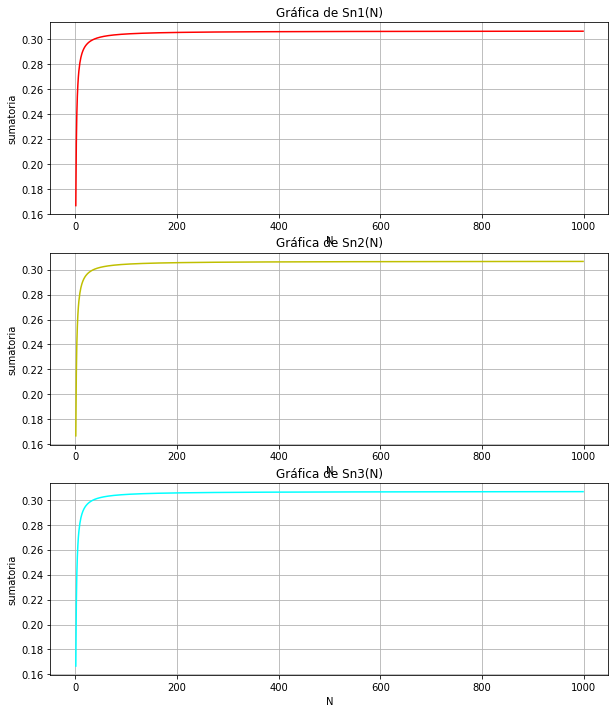

In [114]:
#Gráficas para visualizar de mejor manera si la serie converge o diverge 
N=np.arange(1,1000)
plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
plt.plot(N,LISTA1,color='r')
plt.xlabel("N")
plt.ylabel("sumatoria")
plt.title("Gráfica de Sn1(N)")
plt.grid(True)
plt.subplot(3,1,2)
plt.plot(N,LISTA2,color='y')
plt.xlabel("N")
plt.ylabel("sumatoria")
plt.title("Gráfica de Sn2(N)")
plt.grid(True)
plt.subplot(3,1,3)
plt.plot(N,LISTA3,color='cyan')
plt.xlabel("N")
plt.ylabel("sumatoria")
plt.title("Gráfica de Sn3(N)")
plt.grid(True)

Se puede ver claramente que las 3 sucesiones convergen aproximadamente a 0,31

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.



In [117]:
#Error relativo para la sucesion Sn1
import numpy as np
N=np.arange(1,1*10**4)
E1=[]
for i in N:
 E=abs((sn1(i)-sn3(i))/sn3(i))
 E1.append(E)

In [118]:
#Error relativo para la sucesion Sn2
E2=[]
for i in N:
 Er=abs((sn2(i)-sn3(i))/sn3(i))
 E2.append(Er)

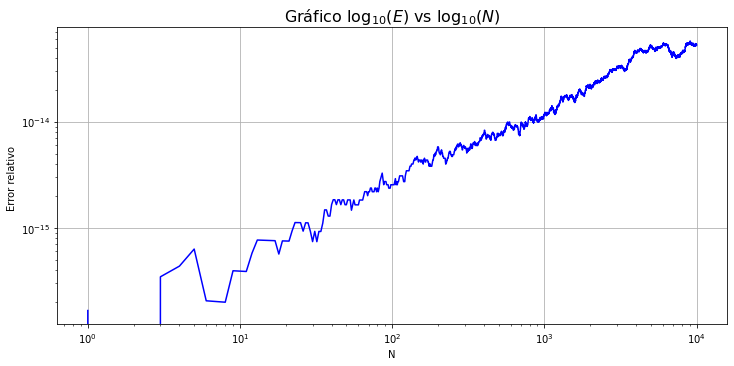

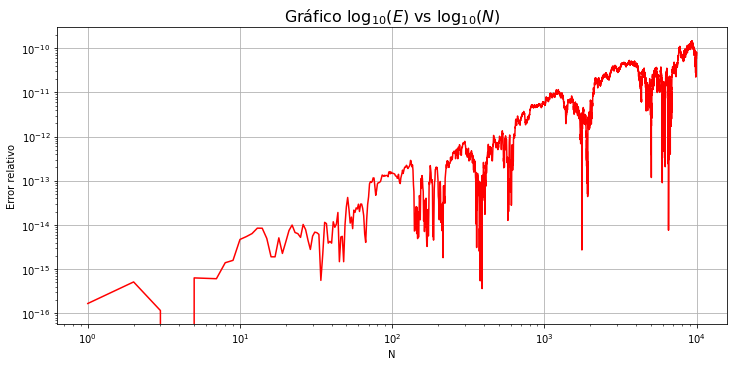

In [119]:
# Graficar los datos en una escala logarítmica
#sucesion Sn1
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.plot(N,E1,color='b')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error relativo ')
plt.title('Gráfico $\log_{10}(E)$ vs $\log_{10}(N)$', fontsize=16)
plt.grid(True)
#sucesion Sn2
plt.figure(figsize=(12,12))
plt.subplot(2,1,2)
plt.plot(N,E2,color='r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error relativo')
plt.title('Gráfico $\log_{10}(E)$ vs $\log_{10}(N)$', fontsize=16)
plt.grid(True)
plt.show()

- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

En las dos gráficas se observa que a medida que se usan más términos el Error aumenta de una manera lenta y al azar.
Lo cual está relacionado con el error de Redondeo dado por:
 $$E_r=\sqrt{N}*E_m$$
donde $E_r$ es Error  de redondeo  y $E_m$ es error de máquina

Por tanto lo mejor seria que el código diera una aproximación aceptable  de la respuesta con un número de pasos no muy grandes para que así mismo no crezca el error.

Es cierto que el error Algorítmico $E_a$ decrece rápidamente con más pasos según 
$$E_a=\frac{\alpha}{N^\beta }$$ 
sin embargo el error debido al redondeo es mucho más grande.